# **cephalometry project:**
## **2D cephalometry landmark localization with CNN** 
### *YOLO V1 based on Residual Learning* 






# Step 1 : Auxiliary steps

 importing essential python libraries

In [0]:
%matplotlib inline
import cv2
import sys
import tensorflow as tf
import numpy as np
import skimage.io as io
import os
from sklearn.model_selection import train_test_split
from math import*
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from scipy.ndimage.interpolation import zoom

In [54]:
if os.getcwd()=='/content':
    try:
        from google.colab import drive
        base_working_dir = '/content/drive/My Drive'
        drive.mount('/content/drive')
    except:
        base_working_dir = os.getcwd()
        pass
sys.path.append(base_working_dir)
!mkdir -p drive
!google-drive-ocamlfuse drive
print(base_working_dir)
from DL.exercise_functions import *

base_working_dir = os.path.join(base_working_dir, 'Skin_Cancer_class')

if not os.path.exists(base_working_dir):
    os.makedirs(base_working_dir)
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: google-drive-ocamlfuse: command not found
/content/drive/My Drive


# Step 2 : Creating dataset

In [0]:
#create dataset
train=[]
label=[]
for i in range(1,301):
    img = io.imread(os.path.join("drive/My Drive/Cephalometry_2d_final/RawImage/TrainingData", "%d_crop.bmp" % i),)
    img=img[0:2176,:]
    img = zoom(img, zoom=0.25, order=1)
    train.append(img)
for j in range(1,301):
    f = open(os.path.join("drive/My Drive/Cephalometry_2d_final/400_senior", "%d.txt" % j))
    fp = open(os.path.join("drive/My Drive/Cephalometry_2d_final/400_junior", "%d.txt" % j))
    line=f.readlines()
    linep=fp.readlines()
    y=(int(line[8].split(',')[1])+int(linep[8].split(',')[1])-200)//8
    x=(int(line[8].split(',')[0])+int(linep[8].split(',')[0]))//8
    coordinate=np.array([x,y])
    label.append(coordinate)
x_train=np.array(train)
y_train=np.array(label)


# Step 3 :Train-Test split


In [0]:
x_train=np.expand_dims(x_train,axis=3)
x_train, x_test, y_train, y_test =train_test_split(x_train,y_train, test_size=0.1, random_state=66)
x_train, x_validate, y_train, y_validate =train_test_split(x_train,y_train, test_size=0.11, random_state=66)

Check the shape of dataset

In [57]:
print(x_train.shape)
print(y_train.shape)

(240, 544, 480, 1)
(240, 2)


define loss function for CNN model

In [0]:
def euclidean_distance(y_true, y_pred):
  return K.mean(K.sqrt(K.sum(K.square(y_pred-y_true),axis=-1)))

# Step 4: Define the model

#YOLO V1 



In [0]:
def yolov1(pretrained_weights = None,input_size = (544,480,1)):

  # Convolution block 0
  inputs = Input(input_size)
  conv0 = Conv2D(16,7,strides=(2, 2),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(inputs)
  BN0=BatchNormalization()(conv0)
  pool0=MaxPool2D(pool_size=(2, 2),strides=(2, 2))(BN0)

  # Convolution block 1
  conv1 = Conv2D(32,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(pool0)
  BN1=BatchNormalization()(conv1)
  pool1=MaxPool2D(pool_size=(2, 2),strides=(2, 2))(BN1)

  # Convolution block 2
  conv2 = Conv2D(16,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(pool1)
  conv2 = Conv2D(32,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv2)
  conv2 = Conv2D(16,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv2)
  conv2 = Conv2D(32,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv2)
  BN2=BatchNormalization()(conv2)
  merge2=add([pool1,BN2])
  pool2=MaxPool2D(pool_size=(2, 2),strides=(2, 2))(merge2)
  pool2 = Conv2D(128,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(pool2)
  

  # Convolution block 3
  conv3 = Conv2D(32,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(pool2)
  conv3 = Conv2D(64,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(32,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(64,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(32,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(64,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(32,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(64,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(64,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  conv3 = Conv2D(128,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv3)
  BN3=BatchNormalization()(conv3)
  merge3=add([pool2,BN3])
  pool3=MaxPool2D(pool_size=(2, 2),strides=(2, 2))(merge3)
  pool3_p = Conv2D(256,3,strides=(2, 2),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(pool3)

  # Convolution block 4
  conv4 = Conv2D(128,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(pool3)
  conv4 = Conv2D(256,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv4)
  conv4 = Conv2D(128,1,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv4)
  conv4 = Conv2D(256,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv4)
  conv4 = Conv2D(256,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv4)
  conv4 = Conv2D(256,3,strides=(2, 2),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv4)
  BN4=BatchNormalization()(conv4)  
  merge4=add([pool3_p,BN4])

  # Convolution block 5
  conv5 = Conv2D(256,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(merge4)
  conv5 = Conv2D(256,3,strides=(1, 1),activation =keras.layers.LeakyReLU(alpha=0.1), padding = 'same', kernel_initializer = 'he_normal')(conv5)
  BN5=BatchNormalization()(conv5) 
  merge5=add([merge4,BN5])

  #flatten and softmax
  dense=Flatten()(merge5)
  # dense=Dense(units=256,activation='relu')(dense)
  dense=Dense(units=128,activation='relu')(dense)
  dense=Dense(units=1024,activation='relu')(dense)
  # dropout=Dropout(0.2)(dense)
  coordinate=Dense(units=2, activation='linear')(dense)

  model = Model(inputs =inputs ,outputs = coordinate)


  # Define the optimizer
  keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  # Compile the model
  model.compile(loss=euclidean_distance,optimizer='Adam', metrics=["accuracy"])

  return model

# Step 5: data augmentation



In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=False,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = False, # Randomly zoom image
        width_shift_range=False,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=False,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)


# Step 6 : Training


In [72]:
model=yolov1()
epochs = 200
batch_size = 5
model_checkpoint = ModelCheckpoint('cnn_regression.hdf5', monitor='loss',verbose=1, save_best_only=True)
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/200
48/48 [==============================] - 10s 203ms/step - loss: 83.0157 - acc: 1.0000 - val_loss: 421.0966 - val_acc: 1.0000
Epoch 2/200
48/48 [==============================] - 1s 29ms/step - loss: 52.0901 - acc: 1.0000 - val_loss: 226.1447 - val_acc: 1.0000
Epoch 3/200
48/48 [==============================] - 1s 29ms/step - loss: 37.2814 - acc: 1.0000 - val_loss: 77.0036 - val_acc: 1.0000
Epoch 4/200
48/48 [==============================] - 1s 29ms/step - loss: 37.2778 - acc: 1.0000 - val_loss: 45.7848 - val_acc: 1.0000
Epoch 5/200
48/48 [==============================] - 1s 29ms/step - loss: 46.5274 - acc: 1.0000 - val_loss: 27.4683 - val_acc: 1.0000
Epoch 6/200
48/48 [==============================] - 1s 30ms/step - loss: 29.8579 - acc: 1.0000 - val_loss: 23.8581 - val_acc: 1.0000
Epoch 7/200
48/48 [==============================] - 1s 29ms/step - loss: 31.0024 - acc: 1.0000 - val_loss: 33.9975 - val_acc: 1.0000
Epoch 8/200
48/48 [==============================] - 1s 29

# Step 7 : History visulization


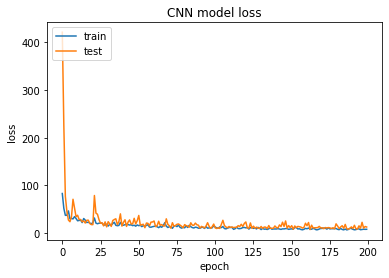

In [73]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Step 8: Evaluation



In [74]:
#euclidean distance
result=model.predict(x_test)
error=result-y_test
distance=[]
for i in range(error.shape[0]):
    ed=np.sqrt(error[i,0]**2+error[i,1]**2)
    distance.append(ed)
distance=np.array(distance)
print("overall mean distance error is",np.mean(distance))


overall mean distance error is 11.601940859279523
